Content in the data
* There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
* There are no null values, so we don't have to worry about that.
* There are 50 observations of each species (setosa, versicolor, virginica).

#Import the Library and dataset

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris_data = pd.read_csv("datasets_19_420_Iris.csv")
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris_data.drop("Id", axis=1, inplace=True)

#Exploratory data Analysis

In [4]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#Data Visualization

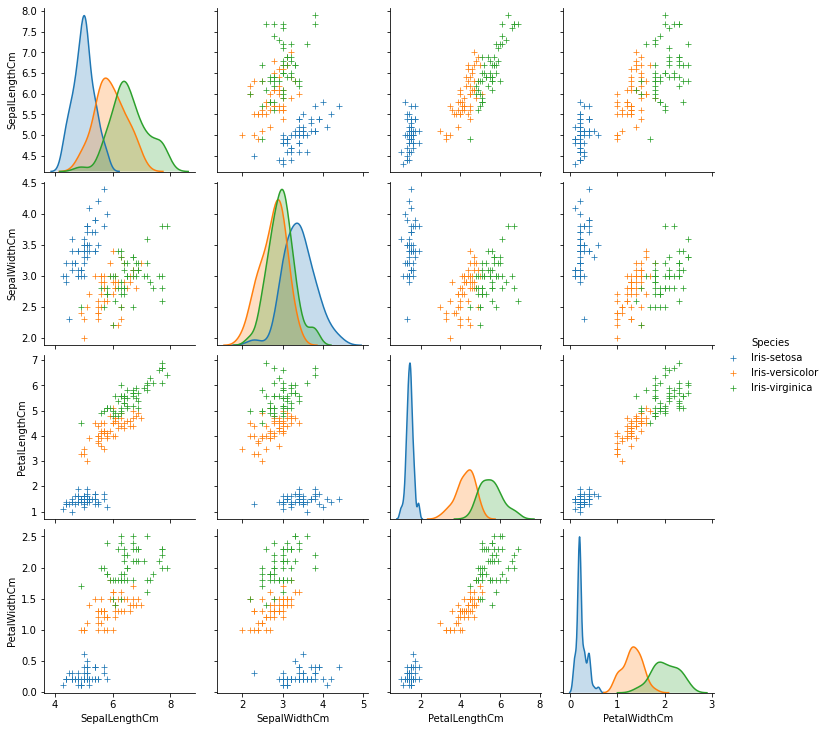

In [6]:
g = sns.pairplot(iris_data, hue='Species', markers='+')
plt.show()

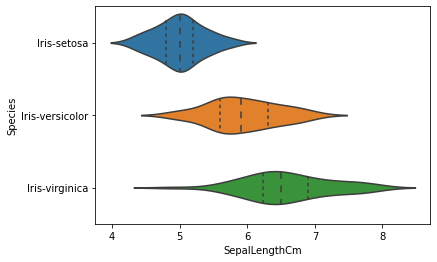

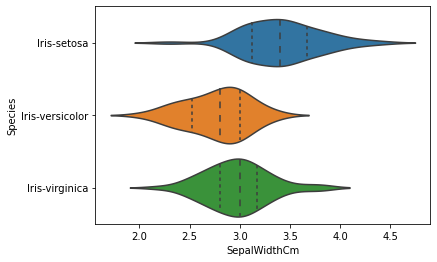

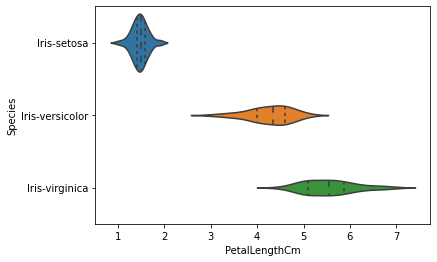

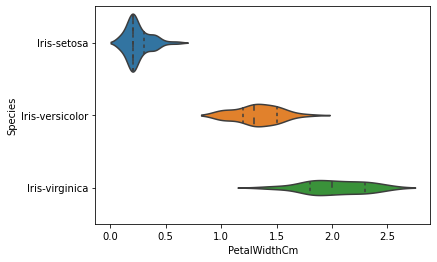

In [7]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris_data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris_data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris_data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris_data, inner='quartile')
plt.show()

# Encoding the Dependent Variable

In [8]:
X = iris_data.iloc[:,:-1].values
y = iris_data.iloc[:,-1].values
print(X.shape, y.shape)

(150, 4) (150,)


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#Creating training and test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


#Training the model

In [12]:
#importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##K-nearest neighbours

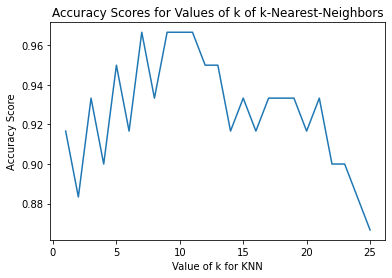

In [13]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

##logistic regression

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic accuracy: " + str(metrics.accuracy_score(y_test, y_pred)))

Logistic accuracy: 0.9166666666666666


##predict

In [15]:
knn.predict([[2,2,2,2]])

array([0])

In [16]:
le.inverse_transform(knn.predict([[3,4,5,6]]))

array(['Iris-virginica'], dtype=object)

In [17]:
np.random.rand(4,1)

array([[0.19516186],
       [0.15176042],
       [0.7058089 ],
       [0.82648389]])

In [18]:
for _ in range(5):
  ran = np.random.rand(1,4)*np.random.uniform(5,9)
  print(ran)
  print(le.inverse_transform(knn.predict(ran)))
  print(le.inverse_transform(logreg.predict(ran)))

[[2.1586753  5.43590363 5.19515627 1.35541288]]
['Iris-versicolor']
['Iris-virginica']
[[4.47323361 5.20990866 0.34097056 5.44691506]]
['Iris-setosa']
['Iris-setosa']
[[2.67916022 3.24192122 0.15296555 6.67294764]]
['Iris-setosa']
['Iris-setosa']
[[3.06127548 6.66304652 0.37299392 3.78426094]]
['Iris-setosa']
['Iris-setosa']
[[6.30336337 3.29399126 1.27614922 3.14489243]]
['Iris-setosa']
['Iris-setosa']


#K_means_clustering

##Using the elbow method to find the optimal number of clusters

In [19]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

Text(0.5, 1.0, 'K-Means')

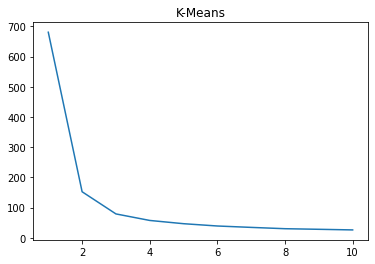

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,  init='k-means++', random_state=42).fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('K-Means')

In [21]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.318753220611924,
 29.954086421037225,
 27.992635739389613,
 25.94725937001595]

##Training the K-Means model on the dataset

In [22]:
kmeans =  KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)

In [23]:
iris_data['category'] = y_pred
print(iris_data)

     SepalLengthCm  SepalWidthCm  ...         Species  category
0              5.1           3.5  ...     Iris-setosa         1
1              4.9           3.0  ...     Iris-setosa         1
2              4.7           3.2  ...     Iris-setosa         1
3              4.6           3.1  ...     Iris-setosa         1
4              5.0           3.6  ...     Iris-setosa         1
..             ...           ...  ...             ...       ...
145            6.7           3.0  ...  Iris-virginica         0
146            6.3           2.5  ...  Iris-virginica         2
147            6.5           3.0  ...  Iris-virginica         0
148            6.2           3.4  ...  Iris-virginica         0
149            5.9           3.0  ...  Iris-virginica         2

[150 rows x 6 columns]


##Visualising the clusters

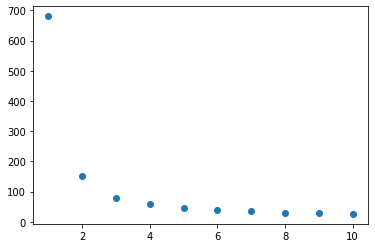

In [24]:
plt.scatter(range(1,11),wcss)

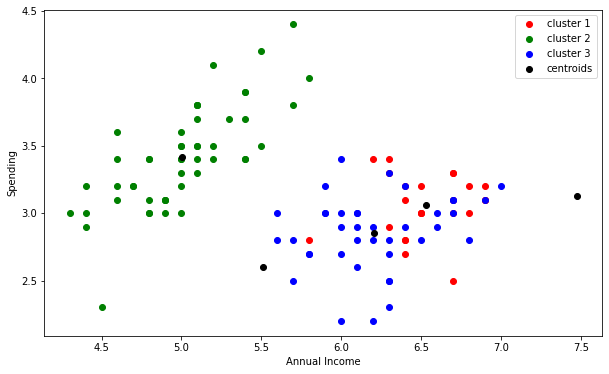

In [25]:
plt.figure(figsize= (10,6))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='r', label='cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='g', label='cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], c='b', label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.legend()